/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


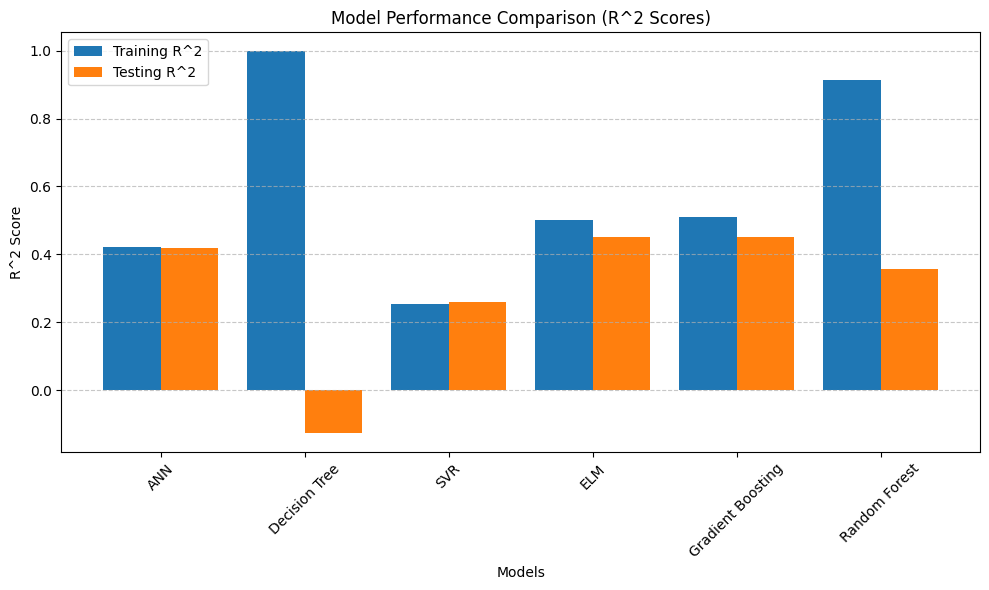

Results saved to model_results.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.preprocessing import StandardScaler
from numpy.linalg import pinv
import matplotlib.pyplot as plt

# Load dataset
file_path = '/content/data_final_version.csv'
data = pd.read_csv(file_path)
data.columns = data.columns.str.strip()

# Feature selection
X = data[['Temperature', 'Humidite', 'Vitesse du vent']].values
y = data['Radiation solaire globale'].values

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize results dictionary
results = {
    "Model": [],
    "Training MSE": [],
    "Training RMSE": [],
    "Training R^2": [],
    "Testing MSE": [],
    "Testing RMSE": [],
    "Testing R^2": []
}

# Helper function to evaluate models
def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, y_train_pred)

    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_test_pred)

    results["Model"].append(model_name)
    results["Training MSE"].append(mse_train)
    results["Training RMSE"].append(rmse_train)
    results["Training R^2"].append(r2_train)
    results["Testing MSE"].append(mse_test)
    results["Testing RMSE"].append(rmse_test)
    results["Testing R^2"].append(r2_test)

evaluate_model(MLPRegressor(hidden_layer_sizes=(2,), max_iter=1000, random_state=42), "ANN")

evaluate_model(DecisionTreeRegressor(random_state=42), "Decision Tree")

evaluate_model(SVR(kernel='rbf', C=1.0, epsilon=0.3), "SVR")

class ExtremeLearningMachine(BaseEstimator, RegressorMixin):
    def __init__(self, n_hidden=300):
        self.n_hidden = n_hidden

    def fit(self, X, y):
        self.input_scaler = StandardScaler()
        X_scaled = self.input_scaler.fit_transform(X)

        self.random_weights = np.random.randn(X_scaled.shape[1], self.n_hidden)
        self.biases = np.random.randn(self.n_hidden)

        H = np.tanh(np.dot(X_scaled, self.random_weights) + self.biases)
        self.output_weights = np.dot(pinv(H), y)

        return self

    def predict(self, X):
        X_scaled = self.input_scaler.transform(X)
        H = np.tanh(np.dot(X_scaled, self.random_weights) + self.biases)
        return np.dot(H, self.output_weights)

elm_model = ExtremeLearningMachine(n_hidden=300)
evaluate_model(elm_model, "ELM")
evaluate_model(GradientBoostingRegressor(random_state=42), "Gradient Boosting")
evaluate_model(RandomForestRegressor(n_estimators=100, random_state=42), "Random Forest")

results_df = pd.DataFrame(results)
results_file_path = 'model_results.csv'
results_df.to_csv(results_file_path, index=False)
plt.figure(figsize=(10, 6))
x_labels = results["Model"]
x = range(len(x_labels))
train_r2 = results["Training R^2"]
test_r2 = results["Testing R^2"]

plt.bar(x, train_r2, width=0.4, label='Training R^2', align='center')
plt.bar([i + 0.4 for i in x], test_r2, width=0.4, label='Testing R^2', align='center')

plt.xticks([i + 0.2 for i in x], x_labels, rotation=45)
plt.xlabel("Models")
plt.ylabel("R^2 Score")
plt.title("Model Performance Comparison (R^2 Scores)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Notify user about saved results
print(f"Results saved to {results_file_path}")


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


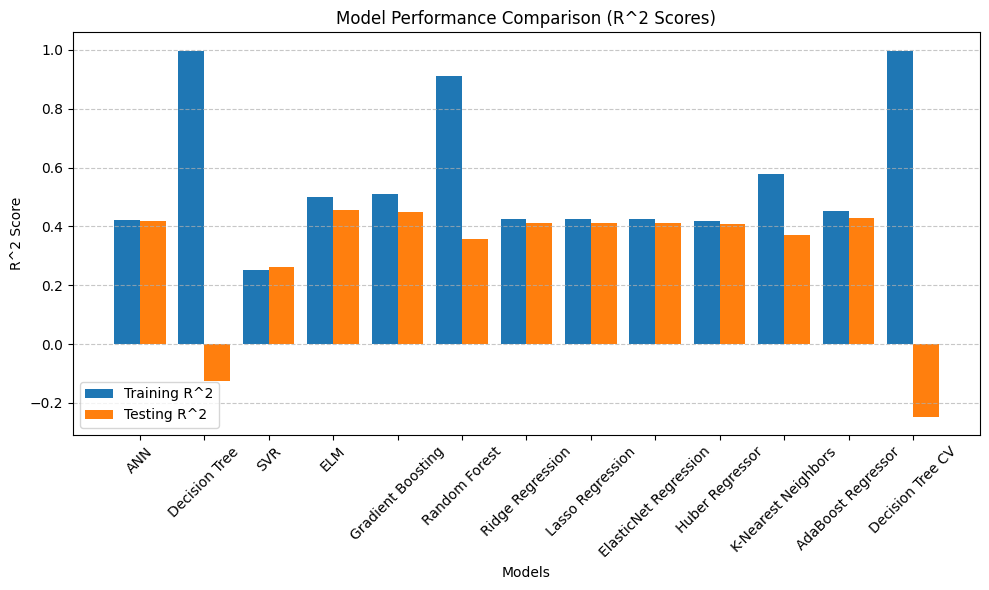

Results saved to model_results.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.preprocessing import StandardScaler
from numpy.linalg import pinv
from sklearn.linear_model import Ridge, Lasso, ElasticNet, HuberRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

file_path = '/content/data_final_version.csv'
data = pd.read_csv(file_path)
data.columns = data.columns.str.strip()

X = data[['Temperature', 'Humidite', 'Vitesse du vent']].values
y = data['Radiation solaire globale'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


results = {
    "Model": [],
    "Training MSE": [],
    "Training RMSE": [],
    "Training R^2": [],
    "Testing MSE": [],
    "Testing RMSE": [],
    "Testing R^2": []
}


def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, y_train_pred)

    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_test_pred)

    results["Model"].append(model_name)
    results["Training MSE"].append(mse_train)
    results["Training RMSE"].append(rmse_train)
    results["Training R^2"].append(r2_train)
    results["Testing MSE"].append(mse_test)
    results["Testing RMSE"].append(rmse_test)
    results["Testing R^2"].append(r2_test)


evaluate_model(MLPRegressor(hidden_layer_sizes=(2,), max_iter=1000, random_state=42), "ANN")
evaluate_model(DecisionTreeRegressor(random_state=42), "Decision Tree")
evaluate_model(SVR(kernel='rbf', C=1.0, epsilon=0.3), "SVR")

class ExtremeLearningMachine(BaseEstimator, RegressorMixin):
    def __init__(self, n_hidden=300):
        self.n_hidden = n_hidden

    def fit(self, X, y):
        self.input_scaler = StandardScaler()
        X_scaled = self.input_scaler.fit_transform(X)

        self.random_weights = np.random.randn(X_scaled.shape[1], self.n_hidden)
        self.biases = np.random.randn(self.n_hidden)

        H = np.tanh(np.dot(X_scaled, self.random_weights) + self.biases)
        self.output_weights = np.dot(pinv(H), y)

        return self

    def predict(self, X):
        X_scaled = self.input_scaler.transform(X)
        H = np.tanh(np.dot(X_scaled, self.random_weights) + self.biases)
        return np.dot(H, self.output_weights)

elm_model = ExtremeLearningMachine(n_hidden=300)
evaluate_model(elm_model, "ELM")


evaluate_model(GradientBoostingRegressor(random_state=42), "Gradient Boosting")
evaluate_model(RandomForestRegressor(n_estimators=100, random_state=42), "Random Forest")

evaluate_model(Ridge(alpha=1.0, random_state=42), "Ridge Regression")
evaluate_model(Lasso(alpha=0.1, random_state=42), "Lasso Regression")


evaluate_model(ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42), "ElasticNet Regression")

evaluate_model(HuberRegressor(), "Huber Regressor")

evaluate_model(KNeighborsRegressor(n_neighbors=5), "K-Nearest Neighbors")


evaluate_model(AdaBoostRegressor(random_state=42), "AdaBoost Regressor")


cv_dt_model = DecisionTreeRegressor(random_state=42)
scores = cross_val_score(cv_dt_model, X, y, cv=5, scoring='r2')
avg_r2_cv = scores.mean()
cv_dt_model.fit(X_train, y_train)
y_train_pred_cv_dt = cv_dt_model.predict(X_train)
y_test_pred_cv_dt = cv_dt_model.predict(X_test)

results["Model"].append("Decision Tree CV")
results["Training MSE"].append(mean_squared_error(y_train, y_train_pred_cv_dt))
results["Training RMSE"].append(np.sqrt(mean_squared_error(y_train, y_train_pred_cv_dt)))
results["Training R^2"].append(r2_score(y_train, y_train_pred_cv_dt))
results["Testing MSE"].append(mean_squared_error(y_test, y_test_pred_cv_dt))
results["Testing RMSE"].append(np.sqrt(mean_squared_error(y_test, y_test_pred_cv_dt)))
results["Testing R^2"].append(avg_r2_cv)

results_df = pd.DataFrame(results)
results_file_path = 'model_results.csv'
results_df.to_csv(results_file_path, index=False)


plt.figure(figsize=(10, 6))
x_labels = results["Model"]
x = range(len(x_labels))
train_r2 = results["Training R^2"]
test_r2 = results["Testing R^2"]

plt.bar(x, train_r2, width=0.4, label='Training R^2', align='center')
plt.bar([i + 0.4 for i in x], test_r2, width=0.4, label='Testing R^2', align='center')

plt.xticks([i + 0.2 for i in x], x_labels, rotation=45)
plt.xlabel("Models")
plt.ylabel("R^2 Score")
plt.title("Model Performance Comparison (R^2 Scores)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


print(f"Results saved to {results_file_path}")


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


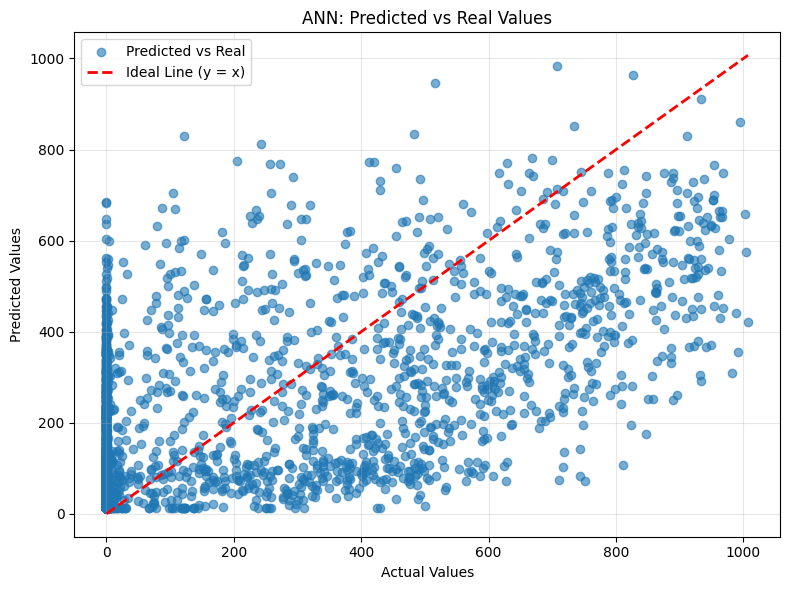

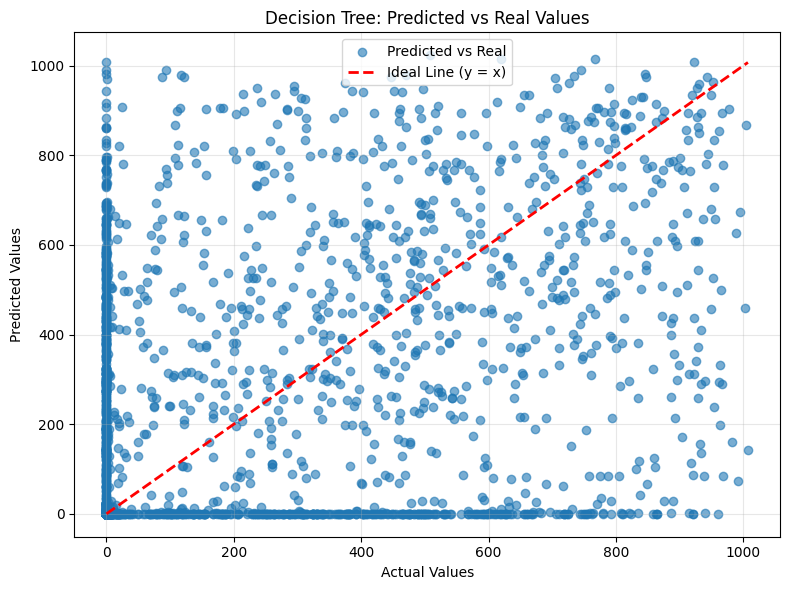

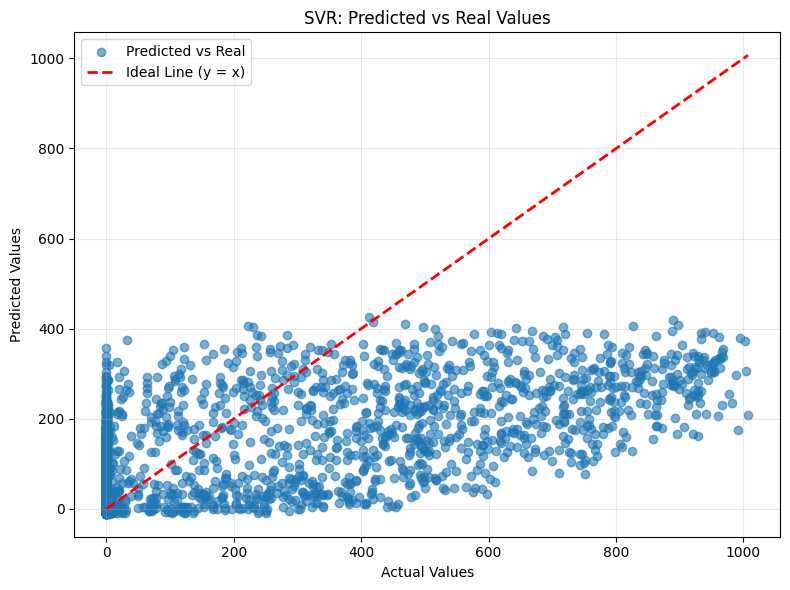

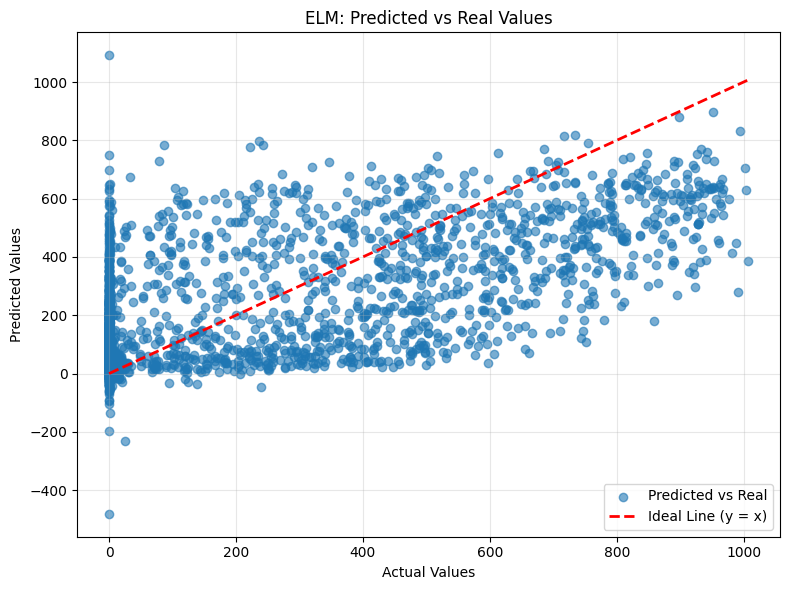

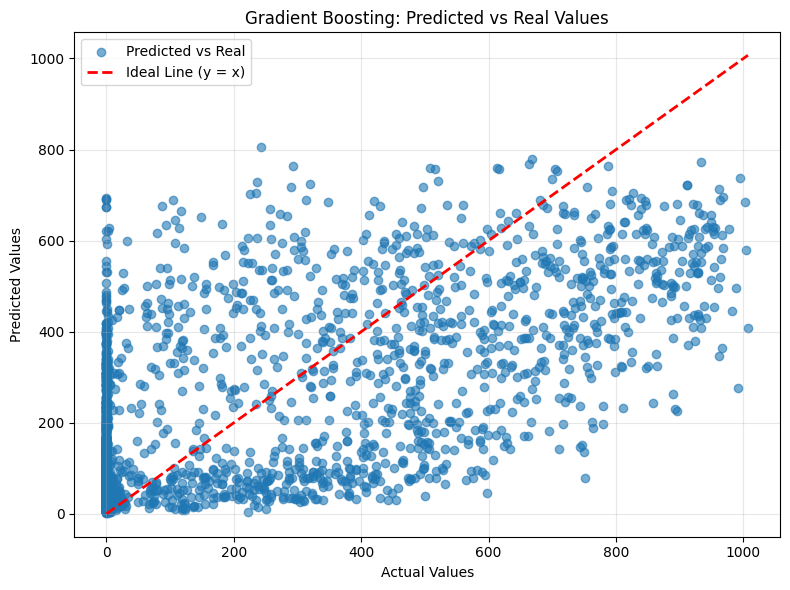

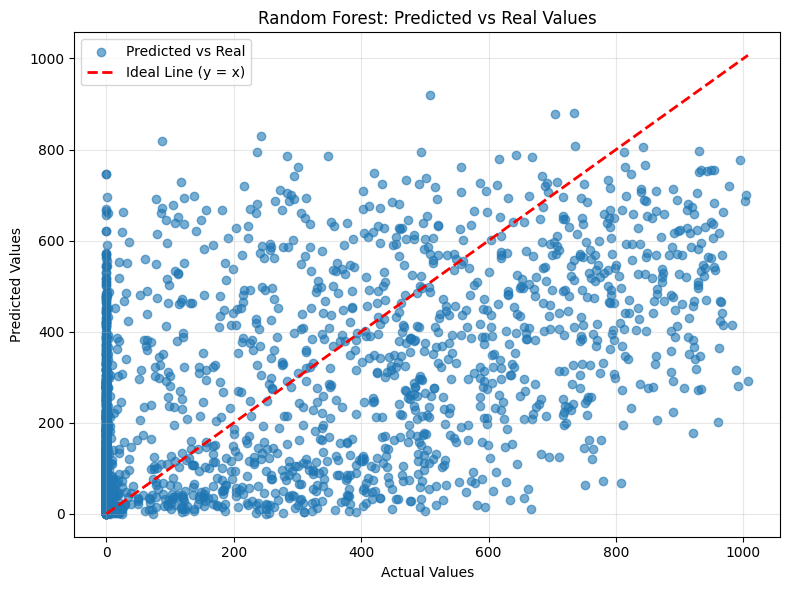

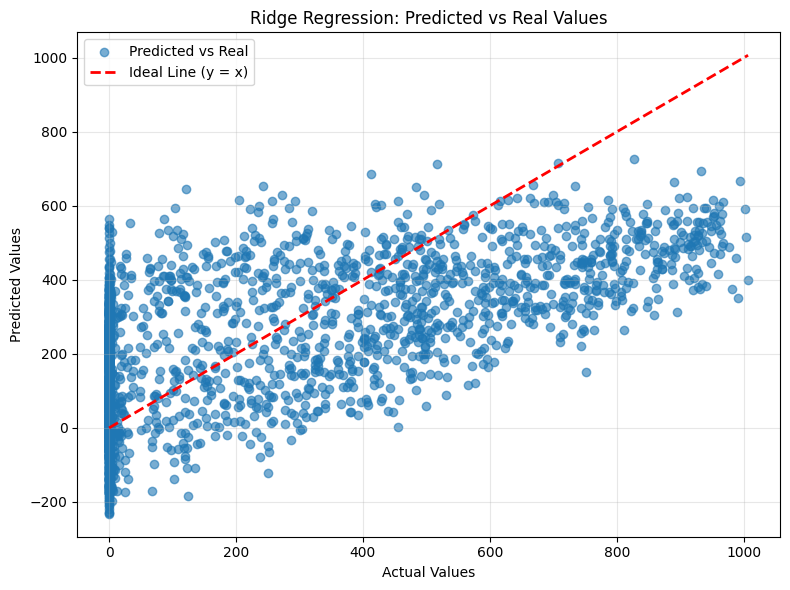

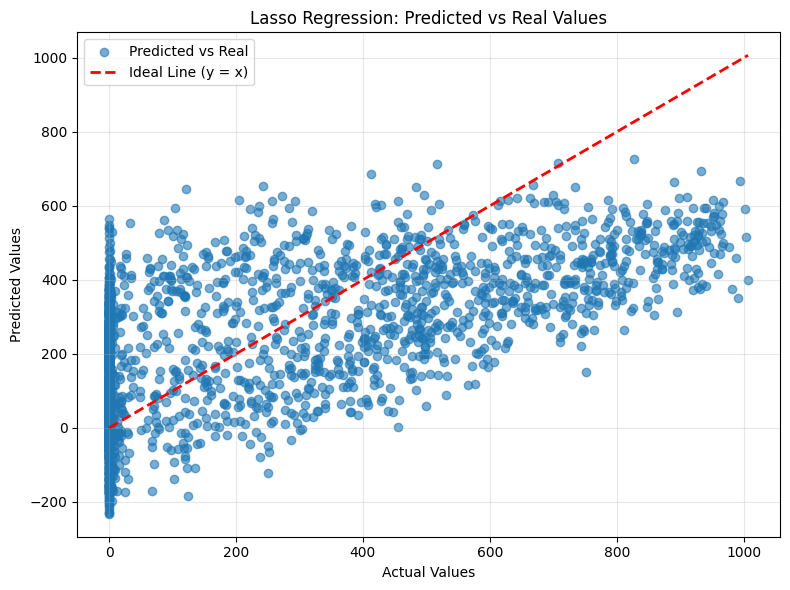

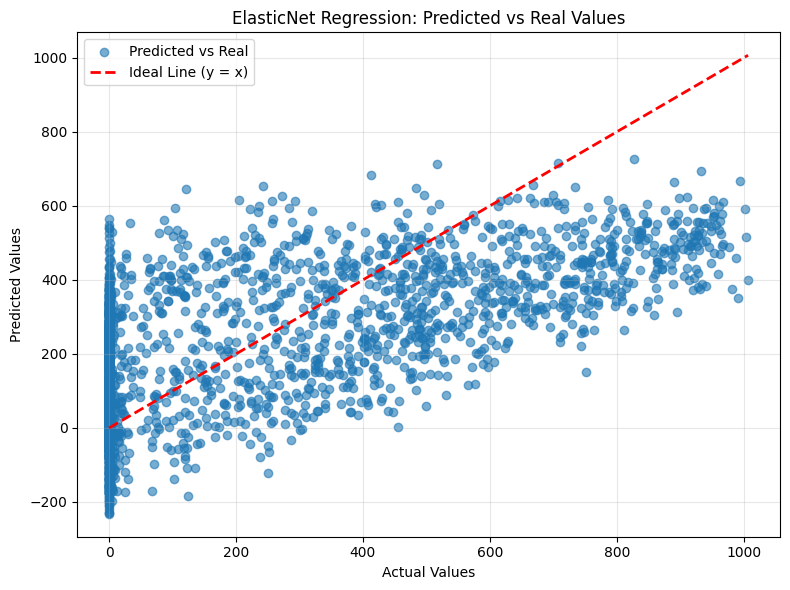

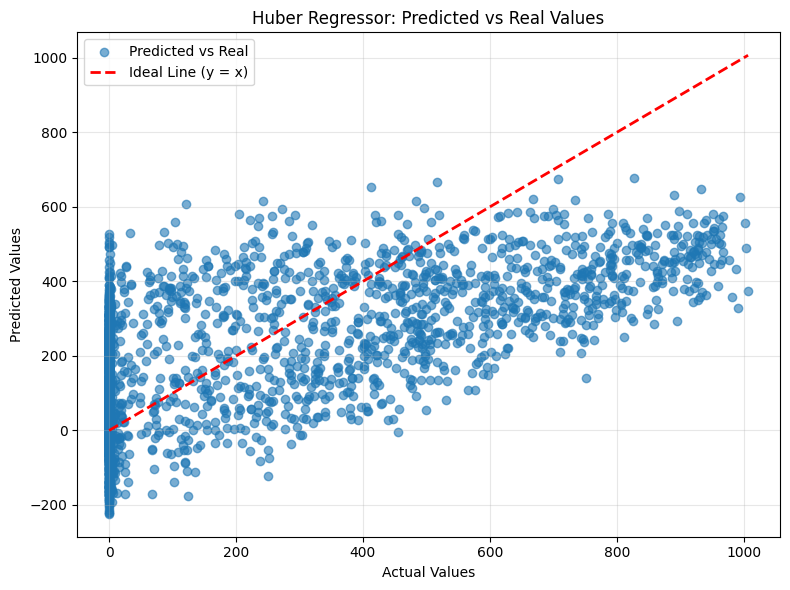

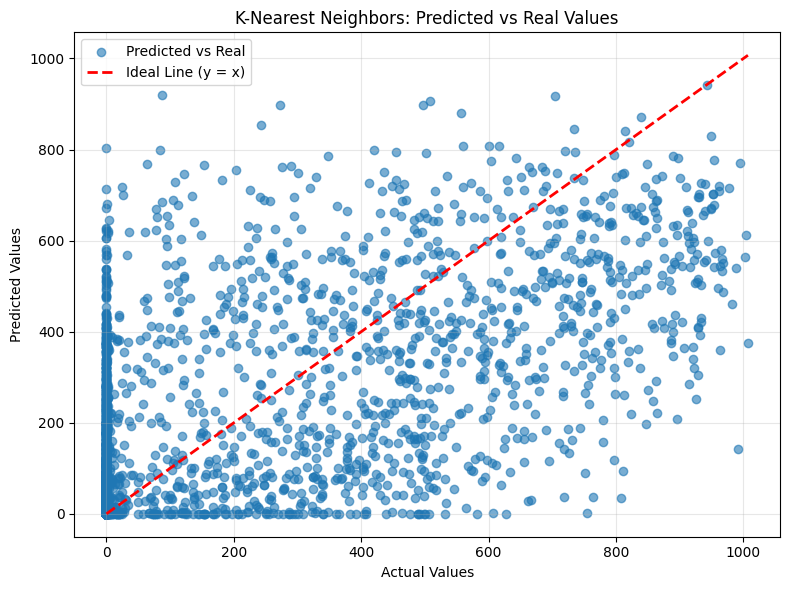

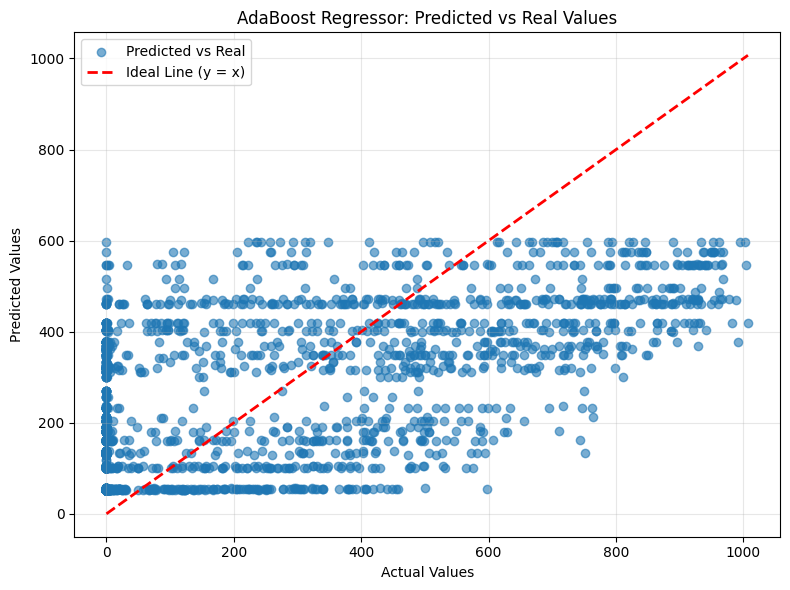

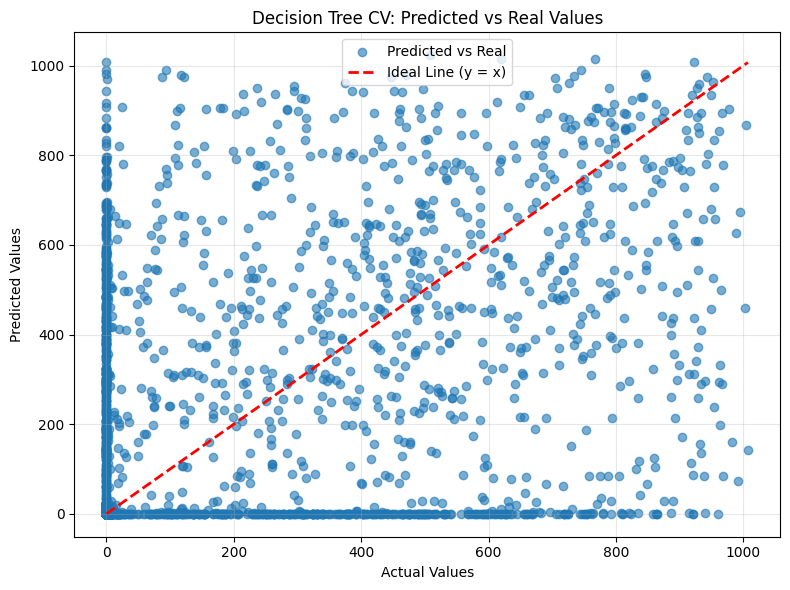

Results saved to model_results.csv


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.preprocessing import StandardScaler
from numpy.linalg import pinv
from sklearn.linear_model import Ridge, Lasso, ElasticNet, HuberRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Load dataset
file_path = '/content/data_final_version.csv'
data = pd.read_csv(file_path)
data.columns = data.columns.str.strip()

# Feature selection
X = data[['Temperature', 'Humidite', 'Vitesse du vent']].values
y = data['Radiation solaire globale'].values

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize results dictionary
results = {
    "Model": [],
    "Training MSE": [],
    "Training RMSE": [],
    "Training R^2": [],
    "Testing MSE": [],
    "Testing RMSE": [],
    "Testing R^2": []
}

# Function to plot predicted vs real values
def plot_predicted_vs_real(model_name, y_test, y_test_pred):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_test_pred, alpha=0.6, label="Predicted vs Real")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Ideal Line (y = x)")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"{model_name}: Predicted vs Real Values")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Helper function to evaluate models
def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, y_train_pred)

    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_test_pred)

    results["Model"].append(model_name)
    results["Training MSE"].append(mse_train)
    results["Training RMSE"].append(rmse_train)
    results["Training R^2"].append(r2_train)
    results["Testing MSE"].append(mse_test)
    results["Testing RMSE"].append(rmse_test)
    results["Testing R^2"].append(r2_test)

    # Plot predicted vs real values for the model
    plot_predicted_vs_real(model_name, y_test, y_test_pred)

# ANN
evaluate_model(MLPRegressor(hidden_layer_sizes=(2,), max_iter=1000, random_state=42), "ANN")

# Decision Tree
evaluate_model(DecisionTreeRegressor(random_state=42), "Decision Tree")

# SVR
evaluate_model(SVR(kernel='rbf', C=1.0, epsilon=0.3), "SVR")

# Extreme Learning Machine (ELM) implementation
class ExtremeLearningMachine(BaseEstimator, RegressorMixin):
    def __init__(self, n_hidden=300):
        self.n_hidden = n_hidden

    def fit(self, X, y):
        self.input_scaler = StandardScaler()
        X_scaled = self.input_scaler.fit_transform(X)

        self.random_weights = np.random.randn(X_scaled.shape[1], self.n_hidden)
        self.biases = np.random.randn(self.n_hidden)

        H = np.tanh(np.dot(X_scaled, self.random_weights) + self.biases)
        self.output_weights = np.dot(pinv(H), y)

        return self

    def predict(self, X):
        X_scaled = self.input_scaler.transform(X)
        H = np.tanh(np.dot(X_scaled, self.random_weights) + self.biases)
        return np.dot(H, self.output_weights)

elm_model = ExtremeLearningMachine(n_hidden=300)
evaluate_model(elm_model, "ELM")

# Gradient Boosting
evaluate_model(GradientBoostingRegressor(random_state=42), "Gradient Boosting")

# Random Forest
evaluate_model(RandomForestRegressor(n_estimators=100, random_state=42), "Random Forest")

# Ridge Regression
evaluate_model(Ridge(alpha=1.0), "Ridge Regression")

# Lasso Regression
evaluate_model(Lasso(alpha=0.1), "Lasso Regression")

# ElasticNet Regression
evaluate_model(ElasticNet(alpha=0.1, l1_ratio=0.5), "ElasticNet Regression")

# Huber Regressor
evaluate_model(HuberRegressor(), "Huber Regressor")

# K-Nearest Neighbors Regressor
evaluate_model(KNeighborsRegressor(n_neighbors=5), "K-Nearest Neighbors")

# AdaBoost Regressor
evaluate_model(AdaBoostRegressor(random_state=42), "AdaBoost Regressor")

# Decision Tree with Cross-Validation
cv_dt_model = DecisionTreeRegressor(random_state=42)
scores = cross_val_score(cv_dt_model, X, y, cv=5, scoring='r2')
avg_r2_cv = scores.mean()
cv_dt_model.fit(X_train, y_train)
y_train_pred_cv_dt = cv_dt_model.predict(X_train)
y_test_pred_cv_dt = cv_dt_model.predict(X_test)

results["Model"].append("Decision Tree CV")
results["Training MSE"].append(mean_squared_error(y_train, y_train_pred_cv_dt))
results["Training RMSE"].append(np.sqrt(mean_squared_error(y_train, y_train_pred_cv_dt)))
results["Training R^2"].append(r2_score(y_train, y_train_pred_cv_dt))
results["Testing MSE"].append(mean_squared_error(y_test, y_test_pred_cv_dt))
results["Testing RMSE"].append(np.sqrt(mean_squared_error(y_test, y_test_pred_cv_dt)))
results["Testing R^2"].append(avg_r2_cv)

# Plot for Decision Tree CV
plot_predicted_vs_real("Decision Tree CV", y_test, y_test_pred_cv_dt)

# Save results to a DataFrame
results_df = pd.DataFrame(results)
results_file_path = 'model_results.csv'
results_df.to_csv(results_file_path, index=False)

# Notify user about saved results
print(f"Results saved to {results_file_path}")
